#### 1. Download the data from here https://github.com/tarunlnmiit/machine_learning/blob/master/DataPreprocessing.csv

##### Perform the following operations on this dataset:
* Importing the libraries required for preprocessing from sklearn.
* Importing the Dataset from the above link.
* Use the necessary function to handling the missing data
* Perform data visualizations using matplotlib or seaborn libraries.
* Use the necessary function for handling of categorical data if any.
* Splitting the dataset into training and testing datasets
* Perform feature Scaling.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("https://raw.githubusercontent.com/tarunlnmiit/machine_learning/master/DataPreprocessing.csv")
display(data)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [46]:
numeric_features = data.select_dtypes(include=['float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
all_features = list(numeric_features) + list(categorical_features)  # can't find any other way to keep the ordering same yet join these two index lists

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('simputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('int_enc', OrdinalEncoder())])

In [48]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


data = pd.DataFrame(preprocessor.fit_transform(data), columns=all_features)
display(data)

,Age,Income,Region,Online Shopper
0,0.758874,0.749473,1.0,0.0
1,-1.711504,-1.438178,0.0,1.0
2,-1.275555,-0.891265,2.0,0.0
3,-0.113024,-0.253200,0.0,0.0
4,0.177609,0.000000,2.0,1.0
5,-0.548973,-0.526657,1.0,1.0
6,0.000000,-1.073570,0.0,0.0
7,1.340140,1.387538,1.0,1.0
8,1.630773,1.752147,2.0,0.0
9,-0.258340,0.293712,1.0,1.0


In [49]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
display(data_train)
display(data_test)

,Age,Income,Region,Online Shopper
6,0.000000,-1.073570,0.0,0.0
4,0.177609,0.000000,2.0,1.0
0,0.758874,0.749473,1.0,0.0
3,-0.113024,-0.253200,0.0,0.0
1,-1.711504,-1.438178,0.0,1.0
7,1.340140,1.387538,1.0,1.0
8,1.630773,1.752147,2.0,0.0
5,-0.548973,-0.526657,1.0,1.0


,Age,Income,Region,Online Shopper
2,-1.275555,-0.891265,2.0,0.0
9,-0.258340,0.293712,1.0,1.0


AxesSubplot(0.125,0.125;0.62x0.755)


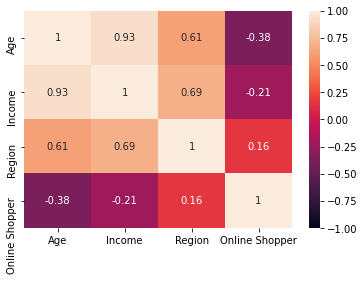

In [50]:
corr_matrix = data_train.corr()
print(sns.heatmap(corr_matrix, annot=True, vmin=-1))